In [9]:
import pandas as pd
import numpy as np
from pykrx import stock
from pykrx import bond

In [10]:
df_samsung = stock.get_market_ohlcv("20180101", "20231012", "086520")
df = pd.DataFrame(df_samsung,columns=['날짜','시가','고가','저가','종가','거래량','등락률'])
df['날짜']= df.index
df.reset_index(drop=True)
df.head()

,날짜,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,,
2018-01-02,2018-01-02,25889,25889,24854,25698,1209037,0.760665
2018-01-03,2018-01-03,26215,26247,24272,24630,1852188,-4.155965
2018-01-04,2018-01-04,24790,24887,23721,23918,1371700,-2.890784
2018-01-05,2018-01-05,24111,25016,24078,24727,1401706,3.382390
2018-01-08,2018-01-08,24920,24985,23950,24144,1156997,-2.357747


<Axes: title={'center': 'samsung close price'}, xlabel='날짜'>

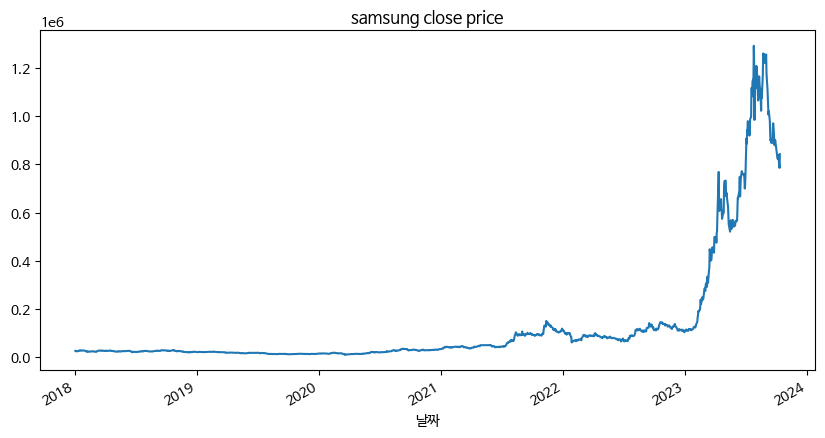

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('samsung close price')
df['종가'].plot()

In [74]:
# import itertools
# combinations = list(itertools.product([1, 2, 3], repeat=3))
# list_pattern = [''.join([dict_1[num] for num in combination]) for combination in combinations]
# len(list_pattern)
len(y_train)


993

In [22]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


close_prices = df['종가']
labels = []
for i in range(1, len(close_prices)):
    if close_prices[i] > close_prices[i-1]:
        labels.append('상')
    elif close_prices[i] == close_prices[i-1]:
        labels.append('보')
    else:
        labels.append('하')
result = ''.join(labels)
list_result = []
for i in range(0, len(result)-2):
    list_result.append(result[i:i+3])
dict_1 = {1: "상", 2: "보", 3: "하"}
dict_1_inverse = {v: k for k, v in dict_1.items()}
encoder = LabelEncoder()
X = [[dict_1_inverse[char] for char in pattern] for pattern in list_result]
X= [int(''.join(map(str,x))) for x in X]
y = encoder.fit_transform(X[3:])  
X_data = np.array(X[:-3])
X_data = np.expand_dims(X_data, axis=-1)
y_data = np.array(y)
X_train, X_test, y_train, y_test = X_data[:993], X_data[993:], y_data[:993], y_data[993:]





In [21]:
# import numpy as np
# len(np.transpose(X_train)[0])
len(X_train)

993

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 의사결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 예측 수행 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.13443396226415094


In [13]:
# LSTM 모델 구축 및 학습 
num_classes = np.max(y_train) + 1
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(np.max(y_train) + 1, activation='leakyrelu')) 
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
Total params: 11,675
Trainable params: 11,675
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 4s 7ms/step - loss: 2.9657 - accuracy: 0.1229
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 2.6390 - accuracy: 0.1188
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 2.4990 - accuracy: 0.1158
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 2.4539 - accuracy: 0.1088
Epoch 5/100
32/32 [==============================]

In [18]:

# 모델 평가
loss_and_metrics = model.evaluate(X_test,y_test,batch_size=30)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 마지막 시퀀스를 기반으로 다음 패턴 예측하기 
last_sequence = X_test
predicted_sequence_encoded=model.predict(last_sequence)

predicted_sequence=[]
for prediction in predicted_sequence_encoded:
    predicted_label=np.argmax(prediction) 
    predicted_label_string=encoder.inverse_transform([predicted_label])[0]
    predicted_label_string=''.join([dict_1[int(digit)] for digit in str(predicted_label_string)])  
    predicted_sequence.append(predicted_label_string)
    
predicted_sequence




15/15 [==============================] - 3s 11ms/step - loss: 2.6202 - accuracy: 0.1226
## evaluation loss and_metrics ##
[2.6202354431152344, 0.12264151126146317]
14/14 [==============================] - 1s 7ms/step


['하상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하하상',
 '하하상',
 '하상상',
 '보보보',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '상하상',
 '하하상',
 '상상하',
 '보보보',
 '하상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '상하상',
 '하하상',
 '하하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하하상',
 '상상하',
 '보보보',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상하상',
 '하하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상하상',
 '하하상',
 '하하상',
 '하상상',
 '상상상',
 '상상상',
 '상상상',
 '상상상',
 '하상상',
 '상하상',
 '하하상',
 '하상상',
 '상상상',
 '상하상',
 '하하상',
 '하하상',
 '하상상',
 '상하상',


In [27]:
dict_profit = {}
for i in range(0, len(result)-2):
    pattern = ''.join(labels[i:i+3])
    profit = (df['종가'][i+3]-df['종가'][i])/df['종가'][i]*100
    date = df['날짜'][i].strftime('%Y-%m-%d') + ' - ' + df['날짜'][i+3].strftime('%Y-%m-%d')
    dict_profit[i] = [pattern, profit, date]
df_result = pd.DataFrame(dict_profit.values(), columns=['Pattern', 'Profit', 'Date'])
df_result

,Pattern,Profit,Date
0,하하상,-3.778504,2018-01-02 - 2018-01-05
1,하상하,-1.973203,2018-01-03 - 2018-01-08
2,상하하,0.271762,2018-01-04 - 2018-01-09
3,하하상,-2.094876,2018-01-05 - 2018-01-10
4,하상상,5.897946,2018-01-08 - 2018-01-11
...,...,...,...
1415,상하상,-7.094595,2023-09-26 - 2023-10-05
1416,하상상,-6.881243,2023-09-27 - 2023-10-06
1417,상상하,-4.611650,2023-10-04 - 2023-10-10
1418,상하상,2.181818,2023-10-05 - 2023-10-11


AttributeError: 'Series' object has no attribute 'reshape'

: 

In [28]:
df_predict = df_result[-423:].copy()
df_predict['predict'] = predicted_sequence[:-1]
# df_groupped = df_predict.groupby('predict')
df_groupped.tail() #['Profit'].mean()
# df_predict['predict'].unique()

,Pattern,Profit,Date,predict
1036,하상하,-0.217738,2022-03-21 - 2022-03-24,상상하
1078,상하하,-2.159019,2022-05-19 - 2022-05-24,상상하
1246,상상보,10.363153,2023-01-20 - 2023-01-27,보보보
1250,하상상,3.475513,2023-01-30 - 2023-02-02,상상하
1251,상상상,12.052117,2023-01-31 - 2023-02-03,보보보
1293,상하상,3.309930,2023-03-31 - 2023-04-05,상상하
1294,하상상,4.504505,2023-04-03 - 2023-04-06,보보보
1295,상상상,21.894737,2023-04-04 - 2023-04-07,보보보
1350,하하상,-6.176084,2023-06-26 - 2023-06-29,보보보
1384,하하상,-2.022867,2023-08-11 - 2023-08-17,하하상


In [40]:
# len(X) 
X

array([[3, 3, 1],
       [3, 1, 3],
       [1, 3, 3],
       ...,
       [3, 1, 1],
       [1, 1, 3],
       [1, 3, 1]])

In [24]:
#여기부터
list_test = []
for i in range(0, len(result)-2):
    list_test.append(result[i:i+3])
print(len(list_test))
list_test

472


['하하상하하상',
 '하하상상상하',
 '상상하상상하',
 '상상하하상상',
 '하상상하하보',
 '하하보상하하',
 '상하하하하하',
 '하하하상하상',
 '상하상하하하',
 '하하하상상하',
 '상상하상하하',
 '상하하상상하',
 '상상하하하상',
 '하하상하상상',
 '하상상상상상',
 '상상상상하하',
 '상하하상하상',
 '상하상하상하',
 '하상하하하상',
 '하하상상상하',
 '상상하상하하',
 '상하하상상상',
 '상상상하상상',
 '하상상하하하',
 '하하하상하하',
 '상하하상하하',
 '상하하하보하',
 '하보하상상하',
 '상상하상상하',
 '상상하하상상',
 '하상상상상하',
 '상상하상상하',
 '상상하상하상',
 '상하상상하상',
 '상하상하하상',
 '하하상상하하',
 '상하하하상하',
 '하상하하상상',
 '하상상하하상',
 '하하상하상하',
 '하상하하상상',
 '하상상하하상',
 '하하상상상하',
 '상상하상상하',
 '상상하하상상',
 '하상상상상하',
 '상상하하상상',
 '하상상보하상',
 '보하상하하하',
 '하하하하하상',
 '하하상하하상',
 '하하상하상상',
 '하상상상하상',
 '상하상하상상',
 '하상상상하하',
 '상하하하하상',
 '하하상하상상',
 '하상상상상하',
 '상상하하상상',
 '하상상하하하',
 '하하하상하상',
 '상하상상하상',
 '상하상상상상',
 '상상상상상상',
 '상상상하하상',
 '하하상하하상',
 '하하상하하상',
 '하하상상상하',
 '상상하상하하',
 '상하하하하상',
 '하하상하상하',
 '하상하상하하',
 '상하하상상하',
 '상상하상하상',
 '상하상상하하',
 '상하하상하상',
 '상하상상상하',
 '상상하하상상',
 '하상상하상상',
 '하상상하하하',
 '하하하하하상',
 '하하상상하상',
 '상하상하하하',
 '하하하상상하',
 '상상하상하상',
 '상하상상하상',
 '상하상상하상',
 '상하상하상상',
 '하상상하하하',
 '하하하상상하',
 '상상하상상하',

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 문자열 라벨을 숫자로 변환
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(list(result))

# 숫자 라벨을 원-핫 인코딩으로 변환 (3개 클래스: '상', '보', '하')
labels_onehot = to_categorical(labels_encoded)

# 학습 데이터와 타겟 데이터 설정 (시퀀스 길이: 6)
X_data = []
y_data = []
for i in range(0, len(labels_onehot) - 9, 3):
    X_data.append(labels_onehot[i:i+6])
    y_data.append(labels_onehot[i+6:i+9])

X_data = np.array(X_data)
y_data = np.array(y_data)

# 학습 세트와 테스트 세트로 분할 (비율은 80:20으로 설정)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# LSTM 모델 구축 및 학습 
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1] * y_train.shape[2]))
model.add(tf.keras.layers.Reshape((y_train.shape[1], y_train.shape[2])))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

# 모델 평가
loss_and_metrics = model.evaluate(X_test,y_test,batch_size=30)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 마지막 시퀀스를 기반으로 다음 패턴 예측하기 
last_sequence_encoded = labels_onehot[-9:-3].reshape((1,X_test.shape[1],X_test.shape[2]))
predicted_sequence_encoded=model.predict(last_sequence_encoded)[0]

predicted_sequence=[]
for prediction in predicted_sequence_encoded:
    predicted_label=np.argmax(prediction)  
    predicted_label_string=encoder.inverse_transform([predicted_label])[0]  
    predicted_sequence.append(predicted_label_string)
    
print("다음 패턴:", "".join(predicted_sequence))


Epoch 1/50
12/12 [==============================] - 7s 9ms/step - loss: 2.0807 - accuracy: 0.3227
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 1.0229 - accuracy: 0.3050
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 0.8720 - accuracy: 0.3129
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.8868 - accuracy: 0.3245
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 1.2760 - accuracy: 0.3147
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 3.3780 - accuracy: 0.3174
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 5.4037 - accuracy: 0.3200
Epoch 8/50
12/12 [==============================] - 0s 9ms/step - loss: 4.4949 - accuracy: 0.3298
Epoch 9/50
12/12 [==============================] - 0s 11ms/step - loss: 5.1837 - accuracy: 0.3351
Epoch 10/50
12/12 [==============================] - 0s 14ms/step - loss: 5.5620 - accuracy: 0.3351
Epoch 11/50
12/

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 각 6글자 문자열을 숫자로 변환
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(list_result)

# 학습 데이터와 타겟 데이터 설정 (윈도우 길이: 1)
X_data = labels_encoded[:-1]
y_data = labels_encoded[1:]

# LSTM 모델은 3차원 입력 데이터를 필요로 하므로 reshape 함수 사용 
X_data = X_data.reshape((X_data.shape[0], 1, 1))

# 원-핫 인코딩으로 변환 (클래스 수: len(np.unique(labels_encoded)))
y_data = to_categorical(y_data, num_classes=len(np.unique(labels_encoded)))

# 학습 세트와 테스트 세트로 분할 (비율은 70:30으로 설정)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3)

# LSTM 모델 구축 및 학습 
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1], activation='softmax')) # 출력 레이어의 뉴런 수는 전체 클래스 수와 동일해야 함.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30)

# 모델 평가
loss_and_metrics=model.evaluate(X_test,y_test,batch_size=30)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 마지막 시퀀스를 기반으로 다음 패턴 예측하기 
last_sequence_encoded = X_data[-1].reshape((1, X_test.shape[1], X_test.shape[2]))
predicted_sequence_encoded=model.predict(last_sequence_encoded)[0]

predicted_label=np.argmax(predicted_sequence_encoded)  
predicted_label_string=encoder.inverse_transform([predicted_label])  

print("다음 패턴:","".join(predicted_sequence))

Epoch 1/30
31/31 [==============================] - 5s 4ms/step - loss: 3.0676 - accuracy: 0.0837
Epoch 2/30
31/31 [==============================] - 0s 4ms/step - loss: 2.7174 - accuracy: 0.1220
Epoch 3/30
31/31 [==============================] - 0s 4ms/step - loss: 2.4872 - accuracy: 0.1341
Epoch 4/30
31/31 [==============================] - 0s 4ms/step - loss: 2.3948 - accuracy: 0.1300
Epoch 5/30
31/31 [==============================] - 0s 7ms/step - loss: 2.3704 - accuracy: 0.1361
Epoch 6/30
31/31 [==============================] - 0s 6ms/step - loss: 2.3628 - accuracy: 0.1321
Epoch 7/30
31/31 [==============================] - 0s 5ms/step - loss: 2.3584 - accuracy: 0.1300
Epoch 8/30
31/31 [==============================] - 0s 5ms/step - loss: 2.3546 - accuracy: 0.1381
Epoch 9/30
31/31 [==============================] - 0s 4ms/step - loss: 2.3524 - accuracy: 0.1250
Epoch 10/30
31/31 [==============================] - 0s 4ms/step - loss: 2.3487 - accuracy: 0.1704
Epoch 11/30
31/31 [

In [8]:
data_y[0]
# ['시가', '고가', '저가', '종가', '거래량', '등락률']
# print("Tomorrow's SEC price :", raw_df['종가'][-1] * pred_y[-1] / dfy['종가'][-1], 'KRW')

[0.014619903536049791]

In [1]:
#LSTM 예제
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock


raw_df = stock.get_market_ohlcv("20180101", "20231012", "086520")

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['시가','고가','저가','거래량', '종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_x, train_y, epochs=60)
pred_y = model.predict(test_x)




[[0.7244819646967979, 0.6445743989603221, 0.7576489533010663, 0.08256334701612693, 0.7492217697310093], [0.7352264006139114, 0.6361273554255598, 0.7463768115941428, 0.05536764923932509, 0.7383183684149697], [0.7429009976975639, 0.6400259909031424, 0.7085346215780428, 0.0906821193282697, 0.6783496611767513], [0.6753645433614217, 0.5932423651721512, 0.706924315619911, 0.06409628563533726, 0.6845801762144883], [0.6753645433614217, 0.5938921377517483, 0.7020933977455152, 0.04778335676619261, 0.6947047631508109], [0.6830391404450743, 0.5815464587394035, 0.6618357487922173, 0.08390599030370034, 0.6347360559125925], [0.6515732924020989, 0.5601039636126992, 0.6626409017712832, 0.053886431972231245, 0.6355148702923097], [0.6308518802762372, 0.5536062378167282, 0.6618357487922173, 0.0354487482750999, 0.6464182716083494], [0.6477359938602727, 0.5497076023391456, 0.6264090177133151, 0.0754508989432615, 0.605141109483342], [0.6193399846507583, 0.5549057829759224, 0.6409017713365024, 0.0731695555184

In [4]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')


: 